In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster', font_scale=1.25)

/home/bryan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
sns.set_style('ticks')

In [4]:
%load_ext autoreload 

In [5]:
%autoreload 2

In [6]:
import pandas as pd

In [7]:
import OD_growth_finder as od

In [20]:
experiment = od.OD_growth_experiment('./test_test.xlsx', s=0.2, constant_background=0.08)

In [21]:
growth_data = experiment.get_all_growth_rates(save_pictures=False)

In [22]:
growth_data = growth_data.loc[growth_data['max_index'] != 0, :]
growth_data = growth_data.loc[growth_data['growth_rate'] > 0.05, :]

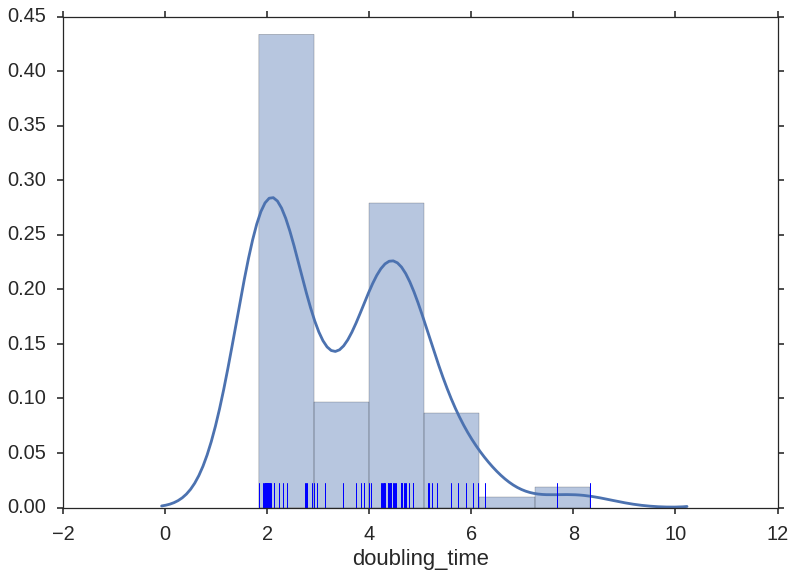

In [23]:
sns.distplot(growth_data['doubling_time'])
sns.rugplot(growth_data['doubling_time'])

plt.savefig('phoebe_pic.png', dpi=300, bbox_inches='tight')

In [13]:
growth_data.to_excel('phoebe_rates.xls')

In [33]:
growth_data.loc[growth_data['well'] == 'H2', :]

,well,growth_rate,max_time,max_index,doubling_time
85,H2,0.377918,4.666667,28,1.83412


Let us visualize the data. That would help marco and phoebe.

In [44]:
growth_data['row'] = growth_data['well'].apply(lambda x: ord(x[0]) - 65)
growth_data['column'] = growth_data['well'].apply(lambda x: int(x[1:]))

We now create an image of the results.

In [70]:
growth_rate_image = np.zeros((growth_data['row'].max() + 1, growth_data['column'].max() + 1))

In [71]:
growth_rate_image[growth_data['row'], growth_data['column']] = growth_data['growth_rate']

In [84]:
min_growth_rate = np.min(growth_data['growth_rate'])
max_growth_rate = np.max(growth_data['growth_rate'])

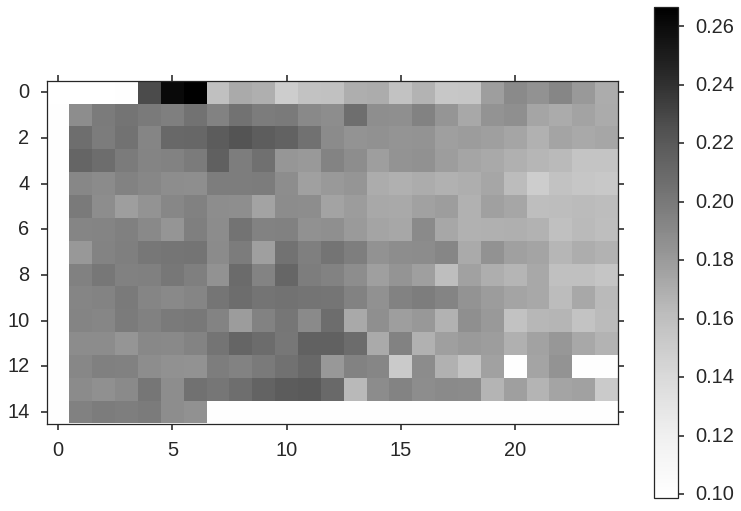

In [91]:
plt.imshow(growth_rate_image, origin='upper', interpolation='None')
plt.colorbar()
plt.clim(min_growth_rate - 0.05, max_growth_rate)

plt.savefig('marco_growth_data.png', dpi=300, bbox_inches='tight')

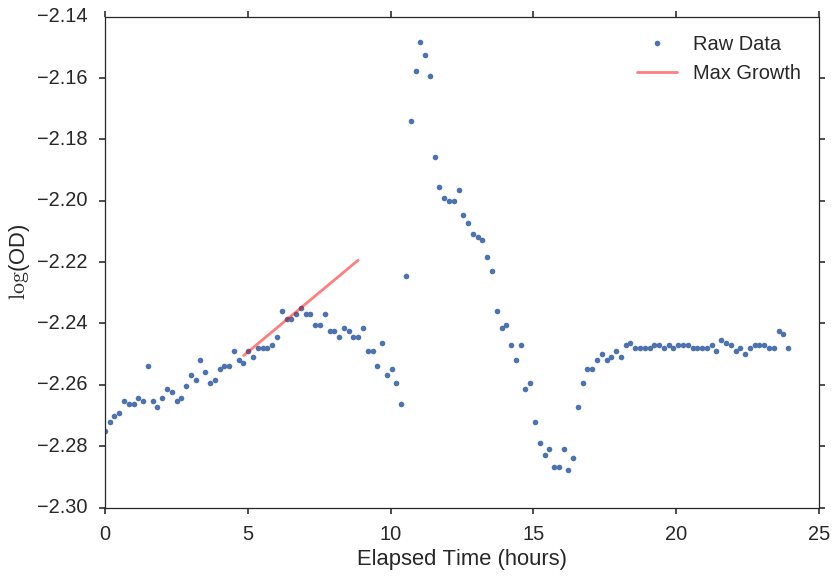

In [15]:
experiment.plot_growth_prediction('O10')

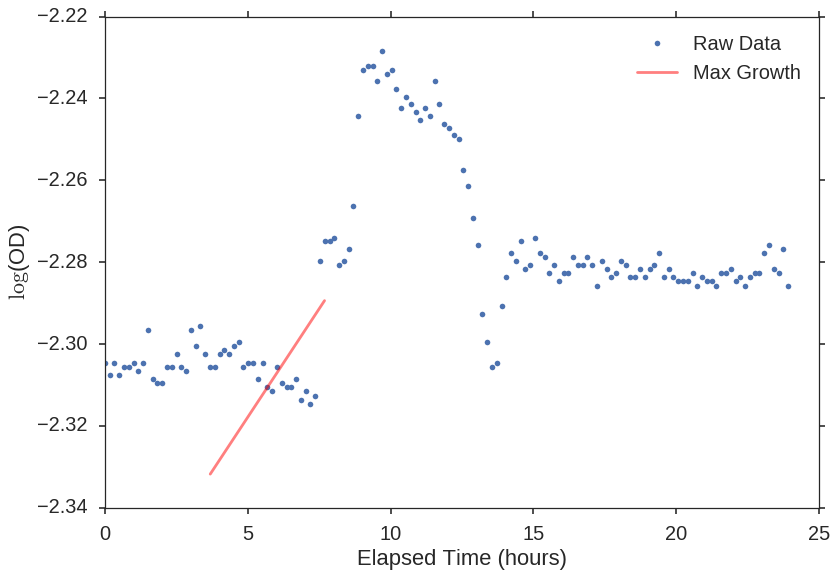

In [48]:
experiment.plot_growth_prediction('O22')